In [263]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [264]:
# load and view data
app_data = pd.read_csv('application_record.csv')
print(f"Shape of the data is: {app_data.shape}")
app_data.head()

Shape of the data is: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [265]:
# Drop OCCUPATION _TYPE  column
app_data = app_data.drop(['OCCUPATION_TYPE','FLAG_WORK_PHONE', 'FLAG_PHONE', "FLAG_EMAIL"], axis=1)
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,1.0


In [266]:
# Load CRUpdate2.csv
credit_data = pd.read_csv('CRUpdate2.csv')
print(f"Shape of the data is: {credit_data.shape}")
credit_data.head()

Shape of the data is: (45985, 65)


,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,0,5001711,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,YES
1,1,5001712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,NO
2,2,5001713,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
3,3,5001714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
4,4,5001715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES


In [267]:
# investigate rows with null values
app_data[app_data.isnull().any(axis=1)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS


In [268]:
# Perform Left outer join to pull in credit approval column
data = pd.merge(app_data, credit_data,on="ID", how="inner")
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,7,NO
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,2,YES
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,YES


In [269]:
data.APPROVAL.unique()

array(['YES', 'NO'], dtype=object)

In [270]:
# Review data types
data.dtypes

ID                  int64
CODE_GENDER        object
FLAG_OWN_CAR       object
FLAG_OWN_REALTY    object
CNT_CHILDREN        int64
                    ...  
58                  int64
59                  int64
60                  int64
SUM                 int64
APPROVAL           object
Length: 78, dtype: object

In [271]:
# Convert categorical type data into a catagorical datatype
data["CODE_GENDER"] = data["CODE_GENDER"].astype("category").cat.codes
data["FLAG_OWN_CAR"] = data["FLAG_OWN_CAR"].astype("category").cat.codes
data["FLAG_OWN_REALTY"] = data["FLAG_OWN_REALTY"].astype("category").cat.codes
data["CNT_CHILDREN"] = data["CNT_CHILDREN"].astype("category").cat.codes
data["NAME_INCOME_TYPE"] = data["NAME_INCOME_TYPE"].astype("category").cat.codes
data["NAME_HOUSING_TYPE"] = data["NAME_HOUSING_TYPE"].astype("category").cat.codes
data["NAME_EDUCATION_TYPE"] = data["NAME_EDUCATION_TYPE"].astype("category").cat.codes
data["NAME_FAMILY_STATUS"] = data["NAME_FAMILY_STATUS"].astype("category").cat.codes
# data["APPROVAL"] = data["APPROVAL"].astype("category").cat.codes
data.dtypes

ID                  int64
CODE_GENDER          int8
FLAG_OWN_CAR         int8
FLAG_OWN_REALTY      int8
CNT_CHILDREN         int8
                    ...  
58                  int64
59                  int64
60                  int64
SUM                 int64
APPROVAL           object
Length: 78, dtype: object

In [272]:
# Convert categorical type data into a catagorical datatype
data["CODE_GENDER"] = data["CODE_GENDER"].astype("category")
data["FLAG_OWN_CAR"] = data["FLAG_OWN_CAR"].astype("category")
data["FLAG_OWN_REALTY"] = data["FLAG_OWN_REALTY"].astype("category")
data["CNT_CHILDREN"] = data["CNT_CHILDREN"].astype("category")
data["NAME_INCOME_TYPE"] = data["NAME_INCOME_TYPE"].astype("category")
data["NAME_EDUCATION_TYPE"] = data["NAME_EDUCATION_TYPE"].astype("category")
data["NAME_FAMILY_STATUS"] = data["NAME_FAMILY_STATUS"].astype("category")
# data["APPROVAL"] = data["APPROVAL"].astype("category")
data.dtypes

ID                    int64
CODE_GENDER        category
FLAG_OWN_CAR       category
FLAG_OWN_REALTY    category
CNT_CHILDREN       category
                     ...   
58                    int64
59                    int64
60                    int64
SUM                   int64
APPROVAL             object
Length: 78, dtype: object

In [273]:
# Assign X (data) and y(target)
X = data.drop("APPROVAL", axis=1)
y = data["APPROVAL"]
print(X.shape, y.shape)

(36457, 77) (36457,)


In [274]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,0,0,0,0,0,0,0,0,3,YES
1,5008805,1,1,1,0,427500.0,4,1,0,4,...,0,0,0,0,0,0,0,0,3,YES
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,0,0,0,0,0,7,NO
3,5008808,0,0,1,0,270000.0,0,4,3,1,...,0,0,0,0,0,0,0,0,2,YES
4,5008809,0,0,1,0,270000.0,0,4,3,1,...,0,0,0,0,0,0,0,0,0,YES


In [275]:
# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [276]:
# Create a logistic Regression Model
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
# Fit model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
# evaluate the model's performance using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6426742740106796
Testing Data Score: 0.6426769061985738


In [279]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
First 10 Actual labels: ['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES']


In [280]:
# View predictions along with their probabilities of being within each class 
##  this will be the difficult part of our project because data is not binary like example: male/female
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(APPROVAL-YES)": [p[0] for p in probs], 
    "P(APPROVAL-NO)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(APPROVAL-YES),P(APPROVAL-NO)
0,NO,NO,0.641304,0.358696
1,NO,NO,0.608798,0.391202
2,NO,YES,0.634939,0.365061
3,NO,NO,0.631778,0.368222
4,NO,NO,0.630053,0.369947
5,NO,NO,0.640758,0.359242
6,NO,NO,0.646338,0.353662
7,NO,YES,0.682763,0.317237
8,NO,NO,0.635678,0.364322
9,NO,YES,0.610945,0.389055


In [281]:
# Model Evaluation
# Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[5858,    0],
       [3257,    0]], dtype=int64)

In [282]:
# Label the confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 5858   False Pos: 0
False Neg: 3257  True Pos: 0


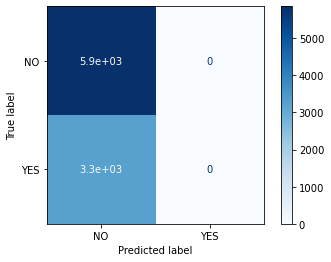

In [283]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [284]:
# Precision and Recall
### we don't technically have a "positive" label, like we would if we were classifying emails as Spam, or patients as having cancer. 
## This means that we need to tell our precision and recall functions which class label we want to consider to be our "positive" class i.e. which lender
from sklearn.metrics import precision_score, recall_score, f1_score

In [285]:
## Random tests of lenders first test is YES, the lender with the most loans
precision_score(y_test, predictions, pos_label="YES")

0.0

In [286]:
## Random tests of lenders second test is NO, random test of lender with lower loan count of 10 loans
precision_score(y_test, predictions, pos_label="NO")

0.6426769061985738

In [287]:
#  what is the harmonic mean of YES Texas from first test
f1_score(y_test, predictions, pos_label="YES")

0.0

In [288]:
#  what is the harmonic mean of NO from second test
f1_score(y_test, predictions, pos_label="NO")

0.7824751218860616